<a href="https://colab.research.google.com/github/K1EH/GCU_MachineLearning/blob/main/ML_1%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
titanic= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sources/train.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 전처리

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


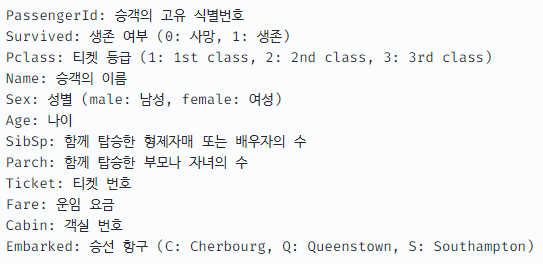

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 생성하고 "Sex" 열을 변환 0 : female, 1 : male
label_encoder = LabelEncoder()
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


**왜 이런 파리미터를 수정하는가?**

Sex[성별] 데이터는 문자열 female, male로 이루어져 있다.

머신러닝 알고리즘은 일반적으로 문자열 데이터보다 숫자 데이터를 다루는데 더 효과적이므로,

0 : female, 1 : male과 같이 수정하였다.

### 결측치 확인

In [ ]:
# 결측치 확인
missing = titanic.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# 나이 결측치는 평균으로 변환
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

### 상관관계 확인

<ipython-input-8-8f2278aa70fd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr().round(1)


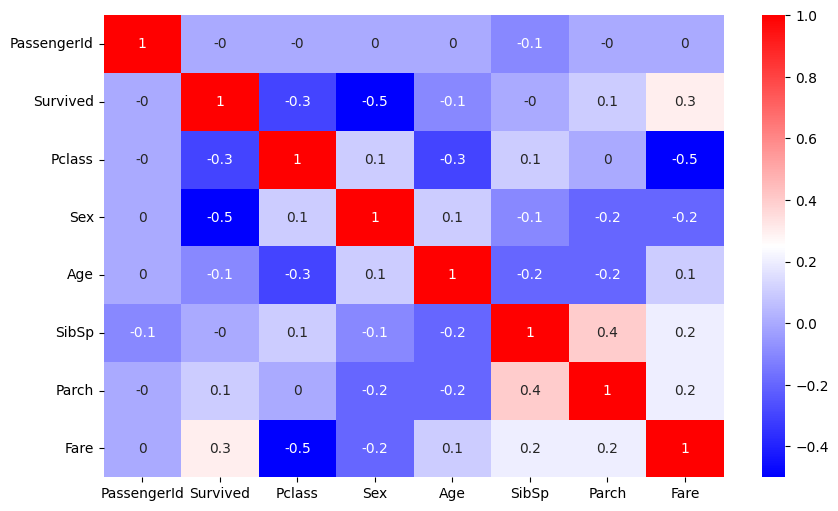

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = titanic.corr().round(1)
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.show()

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**왜 이런 파라미터를 최종적으로 선택했는가?**

Name[이름], PassengerId[승객의 고유 식별번호], Embarked[승선 항구], Ticket[티켓 번호]는 승객의 생존 여부에 영향을 미치지 않는다고 판단하여 제외하였다.

Cabin[객실 번호]는 타이타닉 호의 비상 탈출구나 구명정과 가깝거나 멀다는 데이터가 있다면 유용하겠지만, 그렇지 않고 결측치가 많으므로 제외하였다.

Sibsp[함께 탑승한 형제자매 또는 배우자의 수]는 상관관계 표에서 목표 변수 Survived[생존 여부]와의 상관관계가 0이므로 제외하였다.

## 훈련 세트와 테스트 세트 만들기

In [ ]:
from sklearn.model_selection import train_test_split

#80%의 데이터를 훈련 세트로, 20%의 데이터를 테스트 세트로
X = titanic[['Pclass', 'Age', 'Parch', 'Fare', 'Sex']].to_numpy()
y = titanic['Survived'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size = 0.2, random_state=202035254)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3',
       'x0 x4', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x2^2', 'x2 x3',
       'x2 x4', 'x3^2', 'x3 x4', 'x4^2'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

**왜 이렇게 훈련 및 테스트 세트를 만들었는가?**


### 확률적 경사 하강법

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=202035254)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7921348314606742
0.770949720670391


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=202035254)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 500):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

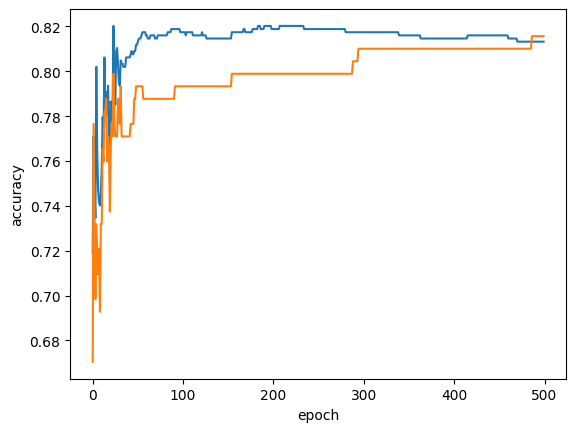

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

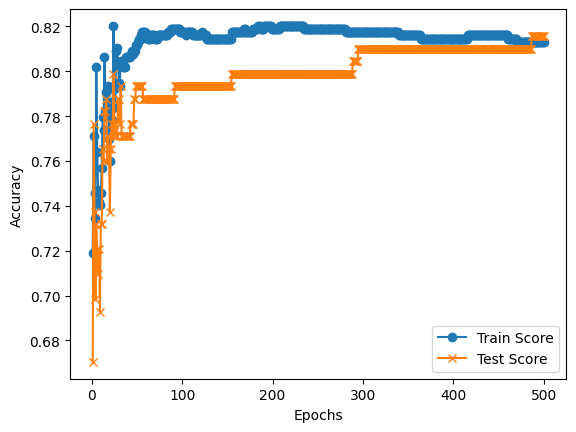

In [ ]:
import matplotlib.pyplot as plt

# train_score와 test_score 리스트가 이미 채워져 있다고 가정합니다.

# 에포크(반복) 횟수
epochs = range(1, len(train_score) + 1)

# 훈련 점수와 테스트 점수를 그래프로 표현
plt.plot(epochs, train_score, label='Train Score', marker='o')
plt.plot(epochs, test_score, label='Test Score', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=478, tol=None, random_state=202035254)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8160112359550562
0.8100558659217877


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202035254)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9803370786516854
0.8491620111731844


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 튜닝할 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [None, 10, 20, 30],  # 최대 깊이
    'min_samples_split': [2, 5, 10],  # 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2']  # 고려할 최대 특성 수
}

# 그리드 서치를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=202035254), param_grid, cv=5)
grid_search.fit(train_scaled, train_target)

# 최적의 모델 출력
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# 훈련 세트 정확도 및 테스트 세트 정확도 출력
print("Training Accuracy:", best_model.score(train_scaled, train_target))
print("Test Accuracy:", best_model.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Model: DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, random_state=202035254)
Training Accuracy: 0.8735955056179775
Test Accuracy: 0.8324022346368715


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(



### Random Forest

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=202035254)

# 교차 검증
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.983147411586964 0.8034571062740076


In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.08080159 0.27636515 0.03815598 0.31901581 0.28566147]


In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8103932584269663


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기를 만듭니다.
rf = RandomForestClassifier(random_state=202035254)

# 탐색할 하이퍼파라미터 그리드를 정의합니다.
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수에 대한 예시 값
    'max_depth': [None, 10, 20],    # 트리의 최대 깊이에 대한 예시 값
    # 조정하려는 다른 하이퍼파라미터를 추가할 수 있습니다.
}

# GridSearchCV 객체를 만듭니다.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# 훈련 데이터에 대해 그리드 서치를 수행합니다.
grid_search.fit(train_input, train_target)

# 최적의 하이퍼파라미터 및 해당 교차 검증 점수를 출력합니다.
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최적 교차 검증 점수:", grid_search.best_score_)

최적 하이퍼파라미터: {'max_depth': 10, 'n_estimators': 200}
최적 교차 검증 점수: 0.8245050723923963


### 히스토램 기반 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)

#교차검증
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9346955261616255 0.8019600118191667


In [ ]:
from sklearn.inspection import permutation_importance

# 특성 중요도
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=202035254, n_jobs=-1)
print(result.importances_mean)

[0.10533708 0.12261236 0.01558989 0.1494382  0.23033708]


In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=202035254, n_jobs=-1)
print(result.importances_mean)

[0.09944134 0.08379888 0.02458101 0.09329609 0.17039106]


In [ ]:
hgb.score(test_input, test_target)

0.8603351955307262

In [ ]:
from sklearn.model_selection import GridSearchCV

# 모델 정의
hgb = HistGradientBoostingClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'max_iter': [100, 200, 300],  # 최대 반복 횟수
    'max_leaf_nodes': [15, 31, 63],  # 최대 리프 노드 수
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(hgb, param_grid, cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(train_input, train_target)

# 최적의 매개변수 및 교차 검증 점수 출력
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.1, 'max_iter': 100, 'max_leaf_nodes': 15}
Best Cross-Validation Score:  0.8174332709543977
